In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
data = pd.read_csv("bank-additional-full.csv",delimiter = ";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#test
#data.replace("yes",1)

In [5]:
#Label Encoding

In [6]:
y_n = {"y":{"yes":1,"no":0}}
data.replace(y_n,inplace=True)

In [7]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
#Splitting data

In [9]:
x = data.loc[:,data.columns !="y"] #predictor variables
y = data.loc[:,data.columns=="y"] #target variables

In [10]:
x.shape

(41188, 20)

In [11]:
y.shape

(41188, 1)

In [12]:
#test - selecting specific columns
aa = data[["age","job"]]

In [13]:
#One hot coding

In [14]:
cat_data = data.select_dtypes(include="object")
num_data = data.select_dtypes(exclude="object")
num_data.drop("y",axis=1,inplace=True)

In [15]:
cat_data.shape

(41188, 10)

In [16]:
num_data.shape

(41188, 10)

In [17]:
dummy_cat = pd.get_dummies(cat_data,drop_first=True)

In [18]:
dummy_cat.shape

(41188, 43)

In [19]:
dummy_cat

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [20]:
cat_data.shape

(41188, 10)

In [76]:
x = pd.concat([num_data,dummy_cat],axis=1)

In [77]:
x.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [78]:
x.shape

(41188, 53)

In [79]:
x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [25]:
x.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.

In [26]:
# creating train and test data

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=0)

In [28]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (28831, 53)
y_train: (28831, 1)
x_test: (12357, 53)
y_test: (12357, 1)


In [29]:
#Decision Tree classifier

In [30]:
dt = DecisionTreeClassifier(random_state=0,criterion="gini")

In [31]:
model = dt.fit(x_train,y_train)

In [32]:
dt_predict = model.predict(x_test)

In [33]:
dt_precision = metrics.precision_score(y_test,dt_predict)
dt_recall = metrics.recall_score(y_test,dt_predict)
dt_accuracy = metrics.accuracy_score(y_test,dt_predict)
dt_kappa_score = metrics.cohen_kappa_score(y_test,dt_predict)

In [34]:
test_predict=model.predict_proba(x_test)[:,1]

In [35]:
test_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
# ROC Curve

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
score = roc_auc_score(y_test,test_predict)
fpr,tpr,thresholds = roc_curve(y_test,test_predict)

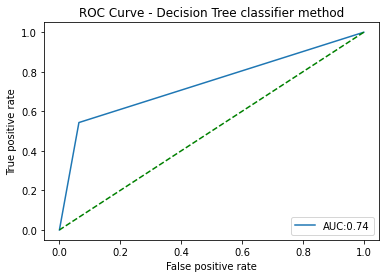

In [38]:
plt.plot(fpr,tpr,label="AUC:{:.2f}".format(score))
plt.legend(loc=4)
plt.plot([1,0],[1,0],"g--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve - Decision Tree classifier method");

In [39]:
precision = metrics.precision_score(y_test,test_predict)
recall = metrics.recall_score(y_test,test_predict)
accuracy = metrics.accuracy_score(y_test,test_predict)
kappa_score = metrics.cohen_kappa_score(y_test,test_predict)

In [40]:
output=pd.DataFrame(data=[precision,recall,accuracy,kappa_score],index=["Precision","Recall","Accuracy","Kappa"],columns=["Score"])

In [41]:
output

,Score
Precision,0.517502
Recall,0.543228
Accuracy,0.891802
Kappa,0.468957


In [42]:
data = {"Precision":[precision],"Recall":[recall],"Accuracy":accuracy,"Kappa":[kappa_score]}

In [43]:
output_1 = pd.DataFrame(data,index=["Gini_Score"])

In [44]:
output_1

,Precision,Recall,Accuracy,Kappa
Gini_Score,0.517502,0.543228,0.891802,0.468957


In [45]:
#Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier(criterion="gini",random_state=0)

In [48]:
rfc = clf.fit(x_train,y_train)

In [49]:
rfc_predict_prob = rfc.predict_proba(x_test)[:,1]

In [50]:
rfc_predict = rfc.predict(x_test)

In [51]:
rfc_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
rfc_predict_prob

array([0.55, 0.04, 0.  , ..., 0.  , 0.  , 0.43])

In [53]:
#ROC Curve

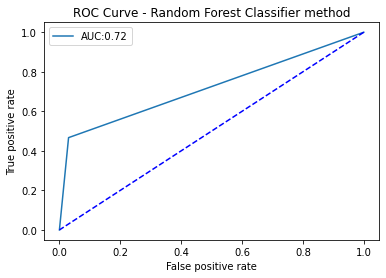

In [54]:
rfc_score = metrics.roc_auc_score(y_test,rfc_predict)
fpr,tpr,threshold = metrics.roc_curve(y_test,rfc_predict)

plt.plot(fpr,tpr,label="AUC:{}".format(round(rfc_score,2)))
plt.legend(loc=2)
plt.title("ROC Curve - Random Forest Classifier method")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot([1,0],[1,0],"b--");

In [55]:
rfc.feature_importances_

array([8.61493240e-02, 2.90059604e-01, 4.14175982e-02, 2.83246172e-02,
       1.58931561e-02, 2.23902562e-02, 2.42767290e-02, 2.66251176e-02,
       1.04564136e-01, 4.86162563e-02, 9.13285477e-03, 4.18638397e-03,
       3.59919699e-03, 7.80485471e-03, 6.21496426e-03, 4.39433938e-03,
       6.93310055e-03, 4.53684529e-03, 1.14458991e-02, 4.14614807e-03,
       1.65834236e-03, 1.35064713e-02, 1.21778647e-02, 4.51027828e-04,
       4.64859634e-03, 8.15597468e-03, 1.21077743e-02, 1.86395124e-04,
       8.79387044e-03, 1.29106972e-02, 4.98787664e-03, 8.62853305e-03,
       0.00000000e+00, 2.22693878e-03, 2.00816950e-02, 2.20535113e-03,
       1.33827045e-02, 1.01323102e-02, 2.46422942e-03, 9.34196764e-04,
       2.82487753e-03, 2.80997536e-03, 4.82408621e-03, 6.28685957e-03,
       2.42220557e-03, 5.89873044e-03, 2.72376805e-03, 1.19760734e-02,
       1.24113035e-02, 1.19291171e-02, 1.15403095e-02, 8.71536468e-03,
       2.52850983e-02])

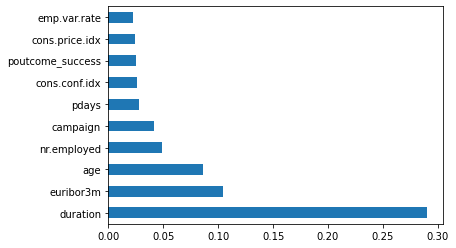

In [56]:
barh = pd.Series(rfc.feature_importances_, index=x.columns)
barh.nlargest(10).plot(kind="barh");

In [57]:
#Random forest using Grid search

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid = {"n_estimators":[2,3,4,5,6,7,8,9,10],"max_features":["auto", "sqrt", "log2"]}

In [60]:
%%time
grid_rfc = GridSearchCV(estimator=clf,param_grid=grid,cv=10)
grid_rfc.fit(x_train,y_train)

Wall time: 1min 11s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [61]:
grid_rfc.best_score_

0.9066627001365793

In [62]:
grid_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 10}

In [63]:
#Randomised search cross validation

In [64]:
a=np.linspace(start=1, stop=5, num=5)

In [65]:
n_esth = [int(x) for x in np.linspace(start=1, stop=5, num=5)]

In [66]:
n_esth

[1, 2, 3, 4, 5]

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
r_grid = {"n_estimators":[int(x) for x in np.linspace(1,5,5)],
          "max_depth":[int(x) for x in np.linspace(1,10,10)],
          "max_features":["auto", "sqrt", "log2"],
          "bootstrap":[True,False],
          "random_state":[0],
          "class_weight":["balanced", "balanced_subsample"],
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf":[1, 2, 4],
         }

In [69]:
r_grid

{'n_estimators': [1, 2, 3, 4, 5],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'bootstrap': [True, False],
 'random_state': [0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [70]:
%%time
rf_random = RandomizedSearchCV(estimator=clf,param_distributions=r_grid,random_state=0,cv=10)
rf_random.fit(x_train,y_train)
rf_random.best_params_

Wall time: 10.4 s


{'random_state': 0,
 'n_estimators': 3,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [71]:
rf_random.best_score_

0.849016473728293

In [72]:
best_model = rf_random.best_estimator_
best_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10, n_estimators=3,
                       random_state=0)

In [73]:
best_model.feature_importances_

array([3.24240872e-02, 2.69252109e-01, 9.45679985e-03, 9.17793284e-02,
       3.40951421e-03, 1.77593827e-01, 2.20323967e-02, 2.89662264e-02,
       1.49594187e-01, 1.43693503e-02, 8.81675881e-03, 1.49993197e-03,
       1.43813868e-03, 6.51176184e-04, 1.01035088e-02, 1.52921291e-04,
       1.94646585e-03, 3.65356738e-03, 2.00437002e-03, 8.61610318e-04,
       8.26814222e-05, 1.45159533e-03, 1.52648664e-03, 9.80543742e-04,
       1.69803504e-03, 1.90525944e-03, 1.39821454e-03, 0.00000000e+00,
       1.76220768e-03, 6.33905442e-03, 1.47383591e-03, 2.20320848e-02,
       0.00000000e+00, 6.70513325e-04, 3.62054161e-03, 1.26631323e-03,
       2.19429147e-03, 3.11524724e-02, 2.42044269e-03, 3.66222327e-06,
       6.53285127e-04, 2.37630768e-03, 7.00960263e-03, 9.88373285e-03,
       1.18869235e-03, 8.56134235e-03, 0.00000000e+00, 1.43183453e-03,
       2.81625149e-03, 2.50141207e-03, 2.09211626e-03, 4.28131701e-02,
       6.68774074e-03])

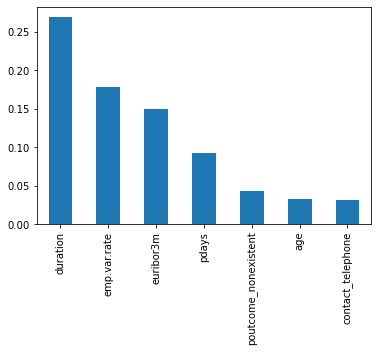

In [74]:
importance = sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), x.columns),reverse=True)

y_val = []
x_val = [x[0] for x in importance]

for x in importance:
    y_val.append(x[1])
    
pd.Series(x_val,index=y_val)[:7].plot(kind='bar')
plt.show();

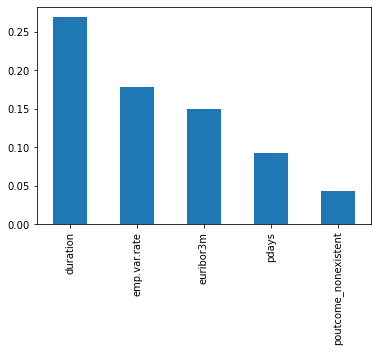

In [112]:
#Another way
x_val = [x[0] for x in importance]
y_val = [x[1] for x in importance]

imp_1 = pd.Series(x_val, index=y_val)

imp_1.nlargest(5).plot(kind="bar");

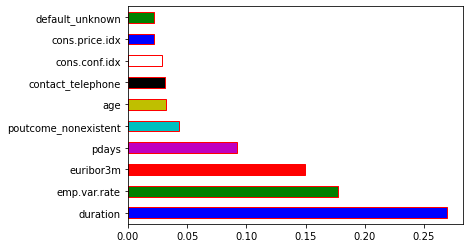

In [80]:
imp = pd.Series(best_model.feature_importances_,index=x.columns)
imp.sort_values(ascending=False).nlargest(10).plot(kind="barh",color=["b","g","r","m","c","y","k","w"],edgecolor="red"
                                                   ,visible=True,animated=True);

In [81]:
# Bagging classifier

In [82]:
from sklearn.ensemble import BaggingClassifier

In [83]:
bag = BaggingClassifier(best_model, random_state=1)
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                        max_depth=10,
                                                        min_samples_leaf=4,
                                                        min_samples_split=10,
                                                        n_estimators=3,
                                                        random_state=0),
                  random_state=1)

In [84]:
bag_predict = bag.predict(x_test)

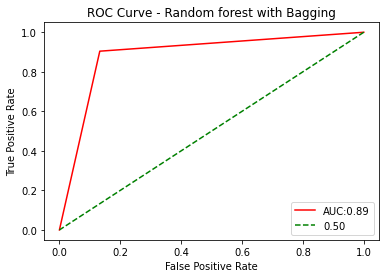

In [85]:
bag_score = metrics.roc_auc_score(y_test,bag_predict)
fpr,tpr,threshold = metrics.roc_curve(y_test,bag_predict)
plt.plot(fpr,tpr,label="AUC:{:.2f}".format(bag_score),color="r")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.plot([1,0],[1,0],"g--",label="0.50")
plt.legend()
plt.title("ROC Curve - Random forest with Bagging");

In [86]:
b_precision = metrics.precision_score(y_test,bag_predict)
b_recall = metrics.recall_score(y_test,bag_predict)
b_accuracy = metrics.accuracy_score(y_test,bag_predict)
b_kappa_score = metrics.cohen_kappa_score(y_test,bag_predict)

In [87]:
#Ada Boost classifier

In [89]:
Ada_boost = AdaBoostClassifier(n_estimators=10,random_state=0)
Ada_boost.fit(x_train,y_train)
ada_predict=Ada_boost.predict(x_test)

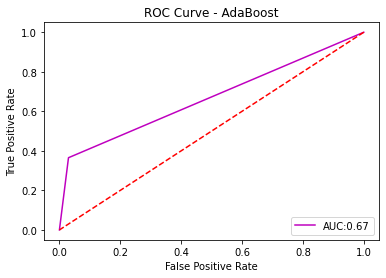

In [90]:
ada_score = metrics.roc_auc_score(y_test,ada_predict)
fpr,tpr,threshold = metrics.roc_curve(y_test,ada_predict)
plt.plot(fpr,tpr,label="AUC:{:.2f}".format(ada_score),color="m")
plt.legend(loc=4)
plt.plot([1,0],[1,0],"r--")
plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate");

In [91]:
ada_precision = metrics.precision_score(y_test,ada_predict)
ada_recall = metrics.recall_score(y_test,ada_predict)
ada_accuracy = metrics.accuracy_score(y_test,ada_predict)
ada_kappa_score = metrics.cohen_kappa_score(y_test,ada_predict)

In [92]:
final = {"Model":["Decision Tree classifier - GINI","Random Forest classifier","Random Forest with Bagging","AdaBoost classifier"],
         "Precision": [dt_precision,precision,b_precision,ada_precision], 
         "Recall":[dt_recall,recall,b_recall,ada_recall],
         "Accuracy":[dt_accuracy,accuracy,b_accuracy,ada_accuracy],
         "Kappa":[dt_kappa_score,kappa_score,b_kappa_score,ada_kappa_score]
}

In [113]:
Results = pd.DataFrame(final)
Results

,Model,Precision,Recall,Accuracy,Kappa
0,Decision Tree classifier - GINI,0.517502,0.543228,0.891802,0.468957
1,Random Forest classifier,0.517502,0.543228,0.891802,0.468957
2,Random Forest with Bagging,0.463100,0.904179,0.871490,0.544881
3,AdaBoost classifier,0.607914,0.365274,0.902242,0.406284


In [117]:
Results["Precision"].max()

0.6079136690647482

In [118]:
Results["Recall"].max()

0.904178674351585

In [119]:
Results["Accuracy"].max()

0.9022416444120741

In [120]:
Results["Kappa"].max()

0.5448811539356618